In [1]:
import torch
import torchvision

from torchsummary import summary

import numpy as np

In [2]:
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    # transforms.RandomCrop(32, padding=4),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [3]:
cifar10_train = torchvision.datasets.CIFAR10('datasets/cifar_10', download=True, transform=transform_train)

Files already downloaded and verified


In [19]:
# we use 0.9 of the whole dataset as the poisoned set
poisoned_set_ratio = 0.9

In [5]:
dataset_images = np.array([c[0] for c in cifar10_train])
dataset_labels = np.array([c[1] for c in cifar10_train])

In [20]:
# create a subset of the dataset
l = len(cifar10_train)
indices = np.arange(l)

np.random.seed(594462)
np.random.shuffle(indices)

# since we use 0.9 of the set as backdoored training set, we will use the rest 0.1 as fixing set
keep_indices = indices[int(l * poisoned_set_ratio):]

new_train_set_images = dataset_images[keep_indices, :, :, :]
new_train_set_labels = dataset_labels[keep_indices]

# create a new training set
new_train_set = torch.utils.data.TensorDataset(torch.tensor(new_train_set_images), torch.tensor(new_train_set_labels))

In [21]:
train_loader = torch.utils.data.DataLoader(new_train_set, batch_size=128, shuffle=True, num_workers=0)

In [22]:
i = 0
for inputs, label in train_loader:
    i += 1

In [23]:
i

40

In [24]:
i * 128

5120

In [17]:
import matplotlib.pyplot as plt

(array([525., 512., 521., 520., 478., 519., 490., 460., 509., 466.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

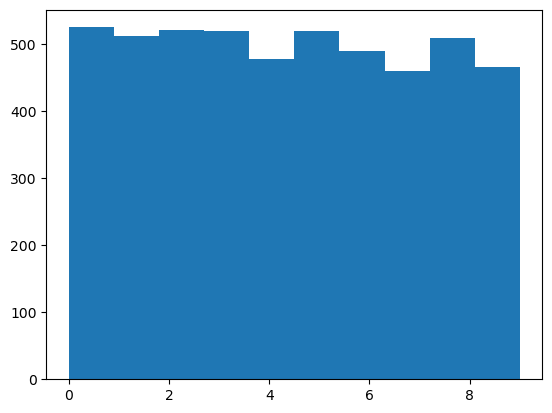

In [25]:
plt.hist(new_train_set_labels, bins=10)

In [29]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.1 MB 3.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.1 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 4.2 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.1 MB 4.3 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 4.3 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 4.3 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 4.5 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 4.5 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 4.5 MB/s eta 0:00:01
   ----------------

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
_, new_train_idx = train_test_split(np.arange(len(new_train_set_labels)),
                                             test_size=0.1,
                                             random_state=999,
                                             shuffle=True,
                                             stratify=new_train_set_labels)

(array([52., 51., 52., 52., 48., 52., 49., 46., 51., 47.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

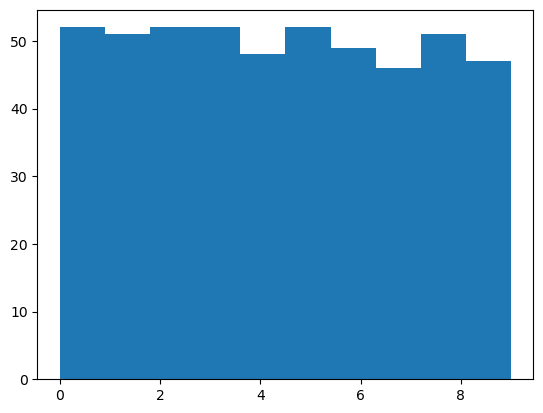

In [34]:
plt.hist(new_train_set_labels[new_train_idx], bins=10)